# Modeling Jet Stream Waviness 
### Alyssa Dellinger, Elliana Hebert, Katie-Rose Slade

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
import math

## Introduction

The scientific theory and model of jet stream waviness plays a pivotal role in our understanding of atmospheric dynamics and climate patterns. The jet stream, a high-altitude, fast-flowing air current, is a key component of the Earth's atmospheric circulation. In recent years, researchers have been increasingly intrigued by the phenomenon of jet stream waviness, characterized by meandering patterns that deviate from the traditional straight and zonal flow. This waviness has been linked to a range of atmospheric and climatic phenomena, including extreme weather events, prolonged periods of heat or cold, and disruptions to regional weather patterns.

Understanding the factors influencing jet stream waviness is crucial for predicting and mitigating the impacts of climate change on a global scale. Scientists employ sophisticated models and theories to investigate the intricate interactions between atmospheric components, such as temperature gradients, pressure systems, and the Coriolis effect, which contribute to the development of jet stream waviness. This research not only enhances our ability to forecast weather patterns but also provides valuable insights into the broader implications of a changing climate on ecosystems, agriculture, and human societies.

The models in our paper focus primarily on how the Linearized Planetary Geostrophic Motion model will change as the zonally asymmetric thermal forcing changes with global warming. They use graphs to depict the flow of the jet stream in the y and z dimensions, in addition to how it looks reflected over the surface of the Earth. Alternatively, our paper focuses on the Linearized Planetary Geostrophic Motion model, and solving it for Phi as a function of elevation. This will show us how the pressure perturbations in the jet stream change with height. 

## Equations

#### Main Equation

The fundamental physical processes involved with this model include wind, pressure, rising motion, the coriolous effect and stability. These all contribute to the general understanding of the model and make up different aspects of the Jet Stream. The parameter "phi"  represents the perturbation in the pressure field of the jet stream. It is a fundamental part of the differential equation and how phi changes with respect to height is the focus of the following models.

The principle equation we solved is the Linearized Planetary Geostrophic Motion model. This model is used to describe the large-scale motion of the atmosphere under the influence of the Earth's rotation. The Linearized Planetary Geostrophic Motion model is derived from the linearized steady-state planetary geostrophic equations that are then combined and integrated to produce equation [1]. The Linearized Planetary Geostrophic Motion model equation is as follows:


[1] $$\frac{\partial^2 \phi_{L}}{\partial z} - \frac{1}{H} \frac{\partial\phi_{L}}{\partial z} + \frac{\beta_{L}S}{U} \phi_{L}  = - \Biggl ({k_{S} +\frac{1}{H} \Biggl)}  \frac{Q_{0}}{U} F(x) e^{-k_{s}z}$$

The first term, $\frac{\partial^2 \phi_{L}}{\partial z}$ represents the second partial derivative of the phi term with respect to the vertical coordinate, z. It describes the curvature or concavity of teh perturbation in regards to the height. 

The ssecond term, $\frac{1}{H} \frac{\partial\phi_{L}}{\partial z}$ represents the effect of the bachground stratification. It dampens the model and is proportional to the first deriviative of $ \phi_L $ with respect to z. 

The third term, $  \frac{\beta_{L}S}{U} \phi_{L} $ describes the coriolis effect and the impact of the vertical stability on the geostrophic motion. 

All of these terms are set equal to the forcing term on the right side of the equation. The terms on the left side of the equation represent the balence between the different forces and effects while the right side represents the external forcing applied to the system.

#### Constants

The model includes various constants that define different aspects of the model. The constants are dimensionless and serve to influence relationships between the different terms. The constants used in the equation are defined below: 

| Parameter     | Value| Description |
|:---------:|:---------| :---------|
| $$ \beta_{L} $$  | 1      |   Beta Effect (Variation of the Coriolis Parameter with Latitude) |
| $$H$$ | 0.5    | Scale Height | 
| $$S $$ | 1    |  Vertical Stability| 
| $$U $$ | 1.5     | Zonal Mean Barotropic Wind Velocity|
| $$ k_{s}$$  | 2      | Vertical Structure of the Perturbation |
|  $$ Q_{0}$$  | 0.5    | Amplitute of the Zonal Asymetric Forcing|
|$$ F(x)$$ | $$\frac{sin(2x)}{2}$$ | Function of the Horizontal Coordinate | 

In [2]:
#define parameters

k_s = 2
beta = 1
H = 0.5
S = 1
U = 1.5

q0 = 0.5 #amplitude of sin(2x)/2

def f(x):
    return np.sin(2*x)/2

def g(x): #derivative of f(x), mentioned in paper
    return np.cos(2*x)

In [3]:
#initialize x and z arrays

xf = 6
zf = 1

nx = 100
nz = 100

x = np.linspace(0,xf,nx)
z = np.linspace(0,zf,nz)

dz = z[1]-z[0]
dx = x[1]-x[0]


#### Initial Conditions

To solve for the model, two matrices were created to initilize the conditions for the model. These matrices consist of blank matrices filled with zeros that will then be added to during the code in order to form a solution.

In [4]:
#Preallocate vectors

phi = np.zeros([nz,nx]) #solution matrix
phi_init = np.zeros([nz,1]) #initial conditions

####  Boundry Conditions

The boundry conditions for the model are required to limit the model to realistic conditions and show how the perturbation in pressure behaves as the lower and upper boundries of the domain. The boundry conditions are derived from the linearized steady-state planetary geostrophic equations that were used to produce the model. The boundary conditions for the model are as follows:


$$ z=0  \rightarrow \frac{\partial \phi_L }{\partial z}\Biggl |_{z=0} =  \frac{Q_{0}}{U} F(x) $$

$$ z=1  \rightarrow \frac{\partial \phi_L }{\partial z}\Biggl |_{z=1} =  \frac{Q_{0}}{U} F(x)e^{-k_{s}} $$

Equation 2 describes the lower boundry for the model when z=0. It specifies that the perturbation of the pressure field at z=0 is equal to $ \frac{Q_{0}}{U} F(x) $.

Equation 3 describes the upper boundry for the model at z=1. It describes how the perturbation of the pressure field at z=1 is equal to $ \frac{Q_{0}}{U}F(x)e^{-k_{s} }$. The addition of $ e^{-k_{s}} $ represents how the vertical structure of the perturbation effects the boundry conditions. 

In [5]:
#boundary conditions

phi[0,0] = (q0*U)*f(x[0]) #surface
phi[-1,-1] = (q0/U)*f(x[-1])*np.exp(-1*k_s) #tropopause

#### Assumptions

The model represented is an idealized flow. Due to the model being idealized, it impacts the model in a variety of ways. The model is unitless, meaning that the constants and varibles are theoretical and have no definite values. For example, the z value, height, is bounded by z=0 and z=1. This is a unitless height that symbolizes the entirety of the atmosphere.

 We assumed there is no interaction with the surface and no forcings other than the thermal forcing. These factors would have to be negligible in order to simplify the model enough to graph it. 

## Numerical methods

To use a numerical method to solve our equation, we first had to discretize the equation to be usable. Our terms were similar to those in the advection equation and in the diffusion equation. This directed us towards our discretization techniques, following the ones used in each of those equations. For the second derivative term, the following discrititation using the centered finite equation was used:

$$\frac{\partial^2 \phi_{L}}{\partial z} = \frac{\phi_{L}^{i+1} - 2\phi_{L}^i + \phi_{L}^{i+1}}{\alpha*z^2} $$

For the first derivative term, the following discritization using the upwind scheme equation was used:

$$ \frac{\partial \phi_{L}}{\partial z} = \frac{\phi_{L}^{i+1} - \phi_{L}^i}{\alpha*z} $$

The discritized terms were then plugged back into the original equation, and the whole equation was solved for $\phi_{L, i+1}^K$ , as shown below:

$$ \phi_{L, i+1}^K = \frac {\alpha*z^2}{1 + \frac{\alpha*z}{H}} \big[\big(k_s+\frac{1}{H}\big)\frac{Q_o}{U}*f(x)*e^{k_s*z_i} - \frac{1}{H}*\frac{\phi_L^i}{\alpha*z}+\frac{B_L*S}{U}*\phi_L^i+2\phi_L^i-\phi_L^{i-1}\big] $$

The numerical method used to model the equation in our study is the centered finite difference method. This method was used since the equation being solved is not in terms of time, making the forward and backward euler methods less useful for creating a model. On top of this, the centered finite difference method is more accurate than the other two methods since it has a smaller truncation error, and highly stable, producing a better model overall. 

In [6]:
#model

for k in range(0,nx-1):
    for i in range(0,nz):
        phi[i,k+1] = (dz**2)/(1+(dz/H))*((k_s+(1/H))*(q0/U)*f(x[k])*np.exp(-1*k_s*z[i])-(1/H)*(phi[i,k]/dz)
                                          +((beta*S)/U)*phi[i,k]+2*phi[i,k]-phi[i-1,k])


## Results

To solve this problem, we simulated how the waviness of the jet stream changes with height and as zonal flow decreases in association with climate change. We found that in general, idealized jet stream waviness decreases in amplitude with increasing height. The z-vector utilized represents the height in the troposphere, in which the surface height is equal to 0 and the tropopause height is equal to 1. In Figure 1, we see that as $\phi_L$, which represents the zonally asymmetric pressure perturbations in the specified pressure field, moves vertically upward, it decreases. This means that the amplitude of the waviness of the jet stream decreases with height. This is better depicted in Figure 3, where there is a visual decrease of amplitude in the waves as the z-values increase. 

### Figure 1

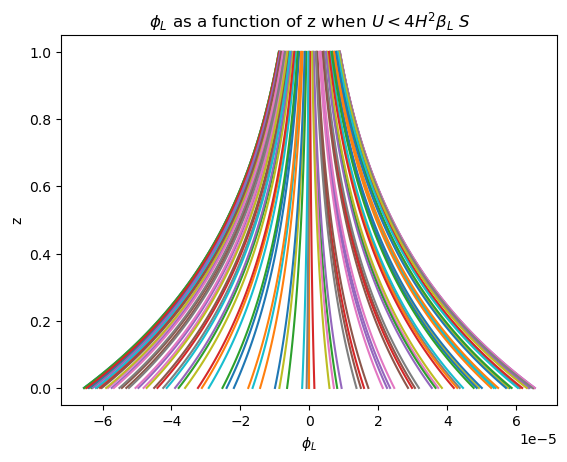

In [7]:
#U < 4*(H**2)*beta*S
plt.plot(phi,z)
plt.xlabel('$\phi_L$')
plt.ylabel('z')
plt.title('$\phi_L$ as a function of z when $U < 4 H^2$' + '$\u03B2_L$' + ' $S$')
plt.show()

These results make sense theoretically, since as zonal air motion increases with height, it is less influenced by the baroclinic instability reponsible for jet stream waviness (Moon et al., 2022). This decrease in height aligns with the results depicted in our source paper, where thermal forcing is used to induce waviness in planetary geostrophic motion (Moon et al., 2022). The results also align with a reanalysis study of the jet stream over a specified time, where there was a general decrease in amplitude over height increase (Francis & Vavrus, 2015). 

The motivation for this study was to show the change in pressure perturbations in an idealized jet stream as the strength of zonal flow decreases as a result of climate change. We found that when decreasing the U parameter, which represents zonal flow, the decrease in amplitude with height relative to the surface remained the same. This shows that this particular result will remain the same despite the changing climate.

This model could be improved by having a more realistic representation of the surface's effect on the jet stream. The waviness of the jet stream is in actuality heavily disrupted by its frictional interaction with the surface. The orographical and meteorological patterns due to the land and sea at the surface are not conducive to the idealized waviness we see here. By adding frictional forcing at the surface, it would be much more realistic of a model.

The primary result of this model is the change in pressure perturbations in the jet stream based off of weakening zonal flow. In this model, we see that as zonal flow weakens, the waviness also weakens. This is depicted by comparing Figures 2 & 5, as well as Figures 3 & 6. By reducing U from 1.5 to 0.5, there is a decrease in the amplitude of the jet stream by 4 magnitudes. When U is large, there is a maximum amplitude of 8 in the waves. When U is small, there is a maximum amplitude of 0.0002. 

### Figure 2

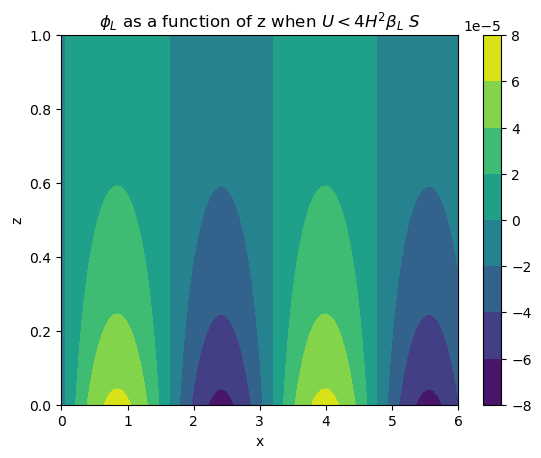

In [8]:
[X,Z] = np.meshgrid(x,z)

plt.contourf(X,Z,phi)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('z')
plt.title('$\phi_L$ as a function of z when $U < 4 H^2$' + '$\u03B2_L$' + ' $S$')
plt.show()

### Figure 3

Text(0.5, 0.92, '$\\phi_L$ as a function of z when $U < 4 H^2$$β_L$ $S$')

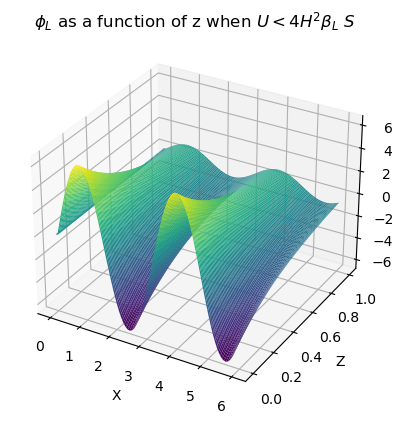

In [9]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot_surface(X,Z,phi, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('surface');
plt.colorbar         
plt.xlabel('X')
plt.ylabel('Z')
plt.title('$\phi_L$ as a function of z when $U < 4 H^2$' + '$\u03B2_L$' + ' $S$')

The large U can be used as a proxy to our current climate, whereas the small U depicts the future strength of zonal flow with current climate change predictions. As the poles of our Earth warm, there will be a decreased temperature gradient between the equatorial and polar atmosphere. This decreased gradient will weaken the zonal flow supporting the jet stream, due to its reliance on the planetary pressure gradient force and subsequent Coriolis force. This model shows that as this zonal flow weakens, the waviness of the jet stream will also decrease. 

### Figure 4

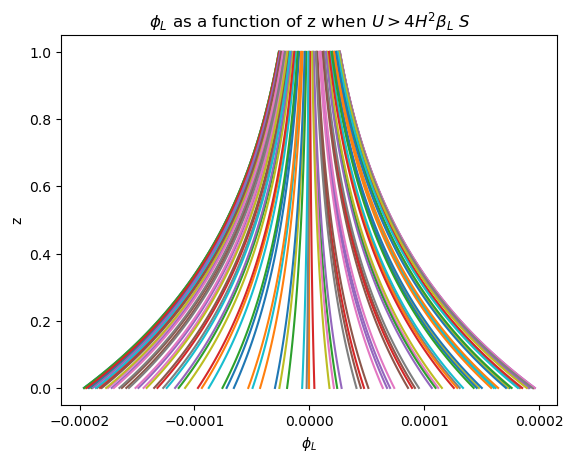

In [15]:
#U > 4*(H**2)*beta*S

#new U
U = 0.5

#new bc's
phi[0,0] = (q0*U)*f(x[0]) #surface
phi[-1,-1] = (q0/U)*f(x[-1])*np.exp(-1*k_s) #tropopause

#new model
for k in range(0,nx-1):
    for i in range(0,nz):
        phi[i,k+1] = (dz**2)/(1+(dz/H))*((k_s+(1/H))*(q0/U)*f(x[k])*np.exp(-1*k_s*z[i])-(1/H)*(phi[i,k]/dz)
                                          +((beta*S)/U)*phi[i,k]+2*phi[i,k]-phi[i-1,k])

#new plot
plt.plot(phi,z)
plt.xlabel('$\phi_L$')
plt.ylabel('z')
plt.xticks([-0.00020,-0.00010,0.0000,0.00010,0.00020])
plt.title('$\phi_L$ as a function of z when $U > 4 H^2$' + '$\u03B2_L$' + ' $S$')
plt.show()

### Figure 5

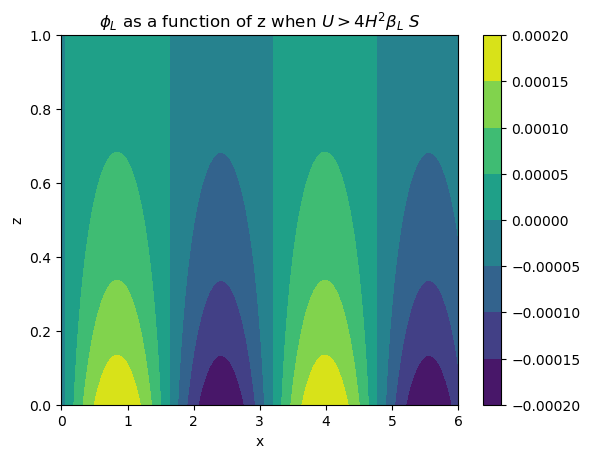

In [12]:
plt.contourf(X,Z,phi)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('z')
plt.title('$\phi_L$ as a function of z when $U > 4 H^2$' + '$\u03B2_L$' + ' $S$')
plt.show()

### Figure 6

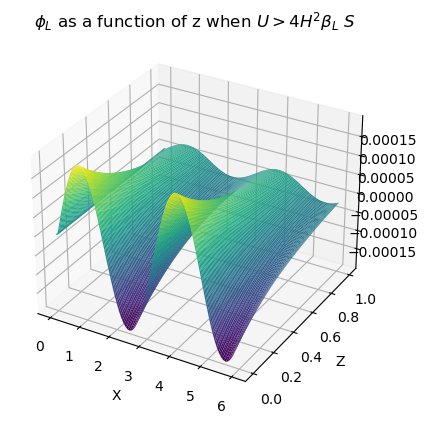

In [13]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot_surface(X,Z,phi, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('surface');
plt.colorbar         
plt.xlabel('X')
plt.ylabel('Z')
plt.title('$\phi_L$ as a function of z when $U > 4 H^2$' + '$\u03B2_L$' + ' $S$')
plt.show()

Our results align well with the results from our source paper, which depict a significant decrease in jet stream waviness based on changes in zonal flow (Moon et al., 2022). They furthered the model by incorporating how the jet stream would look on the xy-plane (longitudinal-latitudinal). Both results in that paper depicted the direct proportionality of jet stream waviness and zonal flow. 

This model could be improved by not only incorporating the zonal mean wind, but also the meridional mean wind. This would give a better depiction of the influence by the mean wind in general rather than just one component. It could also be improved by adding a factor for meteorological patterns on a synoptic scale. This would make the model more applicable to the real world and show how specific climatological patterns (for example, the Aleutian Low) would impact jet stream waviness. 

## References

Moon, Woosok, et al. "Wavier jet streams driven by zonally asymmetric surface thermal forcing." Proceedings of the National Academy of Sciences 119.38 (2022): e2200890119.

OpenAI. "GPT-3.5 (Assistant)." OpenAI, 2022, https://www.openai.com/.
(Helped with understanding how to solve a PDE with only spatial components)

Robel, Alexander. "EarthSystemModelingUG" GitHub, 2022, https://github.com/aarobel/EarthSystemModelingUG.
(Hillslope_erosion_demo.ipynb)

Francis, Jennifer A., and Stephen J. Vavrus. "Evidence for a wavier jet stream in response to rapid Arctic warming." Environmental Research Letters 10.1 (2015): 014005.